In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter
import pywt
import pycwt
import scaleogram as scg 

In [2]:
carpeta = os.abspath('/Users/dianavazquez/Downloads/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H21 OC OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4429.230957,4559.487305,4238.974121,4706.153809,4361.025879,4101.025879,4343.077148,4216.410156,4909.743652,4391.794922,4521.025879,4794.358887,4441.025879,4576.922852
1,4431.794922,4557.948730,4249.230957,4711.282227,4358.461426,4104.615234,4342.563965,4220.000000,4920.512695,4387.179688,4522.051270,4802.563965,4445.128418,4593.846191
2,4428.717773,4559.487305,4248.717773,4710.256348,4356.410156,4103.589844,4343.589844,4219.487305,4923.077148,4388.717773,4522.563965,4811.794922,4447.179688,4592.307617
3,4427.179688,4565.641113,4247.692383,4708.205078,4358.974121,4100.512695,4342.051270,4216.922852,4913.846191,4390.769043,4522.051270,4805.641113,4440.512695,4582.563965
4,4429.743652,4565.641113,4246.666504,4708.205078,4363.589844,4104.102539,4346.666504,4216.410156,4915.384766,4387.692383,4523.077148,4795.897461,4438.461426,4586.153809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17351,4420.512695,4558.974121,4248.205078,4720.512695,4381.538574,4112.820313,4356.410156,4197.436035,4941.025879,4425.128418,4742.563965,4812.307617,4458.461426,4659.487305
17352,4409.230957,4556.410156,4238.974121,4713.333496,4381.025879,4118.974121,4367.692383,4201.538574,4935.897461,4414.871582,4735.897461,4803.077148,4447.692383,4657.436035
17353,4399.487305,4543.589844,4231.282227,4704.615234,4381.025879,4124.102539,4379.487305,4199.487305,4931.282227,4413.333496,4731.794922,4796.410156,4442.563965,4652.307617
17354,4394.871582,4535.897461,4228.717773,4702.563965,4380.512695,4125.128418,4386.666504,4198.461426,4929.230957,4411.794922,4723.589844,4794.358887,4442.563965,4641.025879


In [3]:
fm=128 #frecuencia de muestreo
ti=0 #tiempo de inicio, debe ser número entero
tf=180 #tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt) 
escala=30
rg=int(tf/escala)
aaa=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #bandwith inferior
    high = 45 / nyq #bandwith superior
    b, a = butter(5, [low, high], btype='band')
    env = filtfilt(b, a, al)
    aaa.append(env)


In [4]:
tmp=pd.DataFrame(aaa, nombres)
datosfilt=tmp.transpose()
datosfilt

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,0.676770,0.351148,0.699310,0.684439,-0.239524,0.221202,0.201173,1.073961,0.624093,0.340874,-0.446737,0.579994,-0.452571,0.683325
1,3.779025,-1.249637,11.011367,6.547819,-2.799927,4.066288,0.476351,4.928072,11.913285,-4.115759,0.600472,9.144795,3.811232,17.472058
2,1.385394,1.815302,10.700063,6.149761,-4.359568,2.316381,0.847444,4.520572,12.750756,-2.743961,0.654572,17.154577,5.099112,15.324751
3,-0.053040,6.975340,9.896322,4.770198,-2.314888,-0.232007,0.645044,2.035611,4.625964,-0.689787,0.344774,11.533652,-1.339974,5.545890
4,3.795530,8.344715,8.676513,5.640924,3.231930,3.239623,5.160380,2.078361,5.763647,-3.235584,1.183861,1.904238,-3.278744,8.818962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17351,15.502477,13.909550,11.606776,10.816342,1.044978,-6.572314,-22.692378,-0.026859,10.415995,12.743505,13.192069,15.893530,16.992776,17.264306
17352,6.139649,12.985599,4.298161,5.168300,0.826819,-0.574508,-13.472738,4.751615,5.427860,2.959517,9.008210,8.371161,7.385835,16.082451
17353,-3.108897,2.036362,-2.320043,-2.804361,0.625083,2.937918,-2.738903,5.218363,1.652826,1.387490,6.377820,2.981380,2.701051,10.867368
17354,-5.192487,-4.519745,-2.817565,-3.232115,0.375197,3.810501,2.096709,3.848453,-0.425536,1.235242,1.489814,2.111570,3.648909,1.184583


In [5]:
#OC=datosfilt
ti=0
tf=120
fm=128
pt=(tf-ti)*fm
t=np.linspace(ti,tf,pt) 
fs=128


In [6]:
fm=128 #frecuencia de muestreo
ti_f=0 #tiempo de inicio, debe ser número entero
tf_f=30#tiempo final, debe ser número entero
pt_f=(tf_f-ti_f)*fm#numero de puntos
t1_f=ti_f*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_f=tf_f*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
dt=1/fm
t_f=np.linspace(ti_f,tf_f,pt_f)
senal=np.array(datosfilt)[t1_f:t2_f,6]
np.int=int
senal=np.array(datosfilt)[t1_f:t2_f,6]
np.int=int

In [7]:
senal

array([  0.20117264,   0.47635108,   0.84744364, ...,  -2.84936598,
       -10.81587348, -12.18524178])

In [8]:
len(t_f)

3840

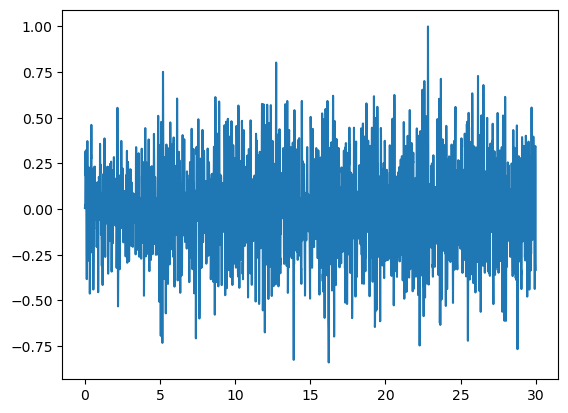

In [9]:
senal=senal-(np.mean(senal)); #normalización
senal=senal/np.std(senal);
senal=senal/max(abs(senal))
plt.plot(t_f,senal)

In [10]:
fr = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4,5])/dt
fs = 1 / dt
coef,freqs=pywt.cwt(senal, fr, 'cmor',fs)

/Users/dianavazquez/anaconda3/lib/python3.11/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


/Users/dianavazquez/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


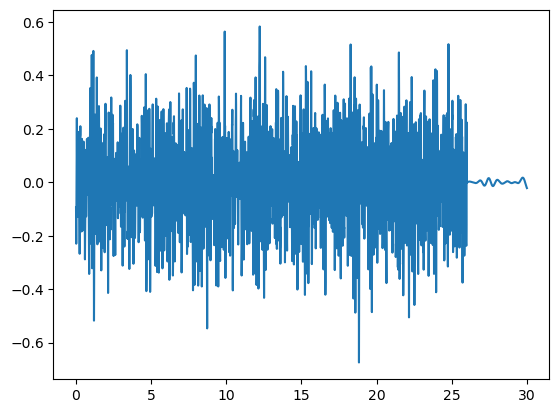

In [11]:
a=coef[0]
b=coef[1]
plt.plot(t_f,b)


frequencies = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4]) / dt
fs = 1 / dt
frequencies = np.array(frequencies) / fs # normalize
scale = pywt.frequency2scale('cmor1.5-1.0', frequencies)
scale

In [12]:
freqs

array([3.05175781e-05, 6.10351562e-05, 9.15527344e-05, 1.22070312e-04,
       1.52587891e-04])

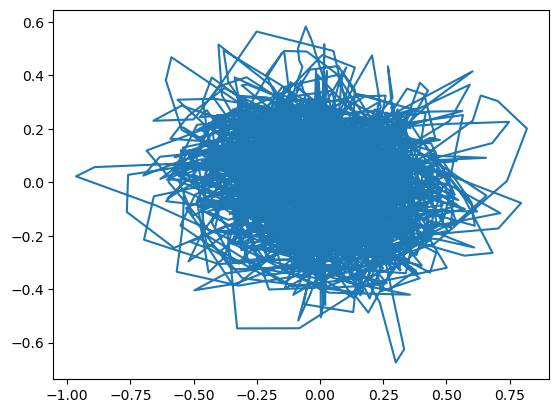

In [13]:
plt.plot(a,b)

/Users/dianavazquez/anaconda3/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Text(0.5, 1.0, 'Espectrograma de Signal')

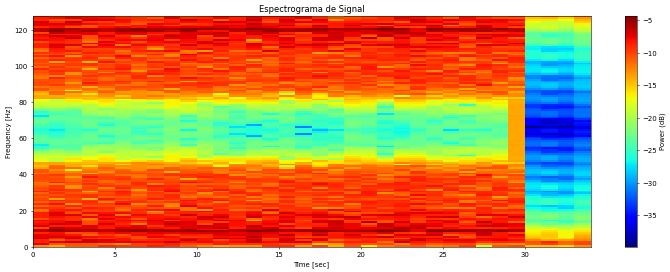

In [14]:
f, t, sxx = signal.spectrogram(b,128,nperseg=128,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal') #plt.ylim(0,500)

/var/folders/fr/5zsr66d15fv3zlk_c7c94xgw0000gn/T/ipykernel_3819/473202740.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(t, f, Sxx)


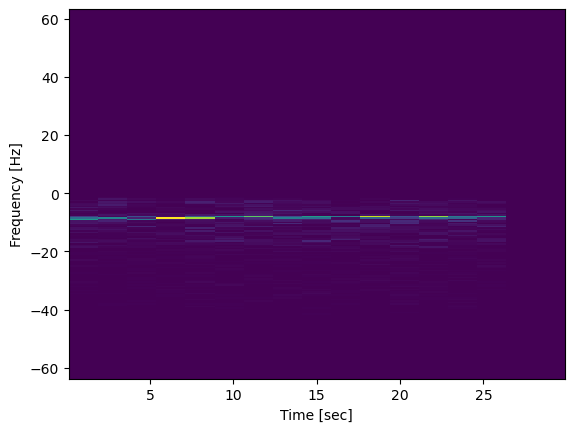

In [15]:
f, t, Sxx = signal.spectrogram(b, 128)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


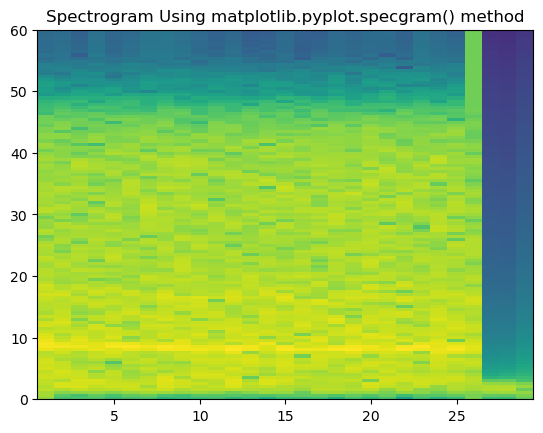

In [16]:
x = t_f #graficar el tiempo
y = b
plt.specgram(y,Fs=128)
plt.title('Spectrogram Using matplotlib.pyplot.specgram() method') 
plt.ylim(0,60)
plt.show() 

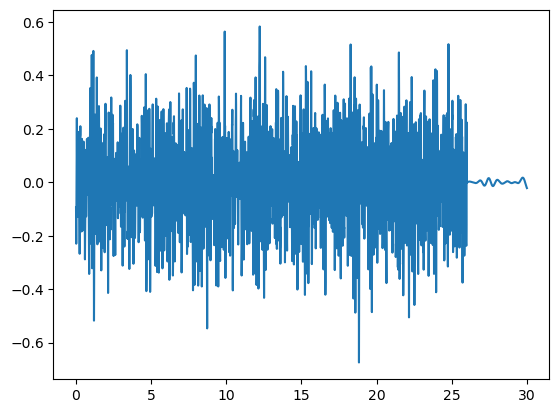

In [17]:
plt.plot(x,b)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import spkit
print('spkit-version ', spkit.__version__)
import spkit as spk

spkit-version  0.0.9.6.7


In [19]:
print(dir(spkit))

['A_law', 'Create_Dictionary', 'HistPlot', 'ICA', 'Mu_law', 'OutLiers', 'PeriodStrength', 'Periodogram', 'RFB', 'RFB_example_1', 'RFB_example_2', 'RFB_prange', 'SVD', 'TD_Embed', 'TWM_algo', 'WPA_coeff', 'WPA_plot', 'WPA_temporal', 'Wavelet_decompositions', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'absolute_import', 'add_noise', 'agg_angles', 'amplitude_equalizer', 'binSize_FD', 'bin_width', 'blackman_lobe', 'cdf_mapping', 'clean_phase', 'conv1d_fb', 'conv1d_fft', 'conv1d_nan', 'conv2d_nan', 'core', 'create_multidim_space_signal', 'create_signal_1d', 'create_signal_2d', 'cwt', 'data', 'denorm_kernel', 'dft_analysis', 'dft_synthesis', 'direction_flow_map', 'dispersion_entropy', 'dispersion_entropy_multiscale_refined', 'division', 'dominent_freq', 'dominent_freq_win', 'eeg', 'entropy', 'entropy_approx', 'entropy_cond', 'entropy_cross', 'entropy_diff_cond', 'entropy_diff_co

Morlet wavelet


(0.0, 30.0)

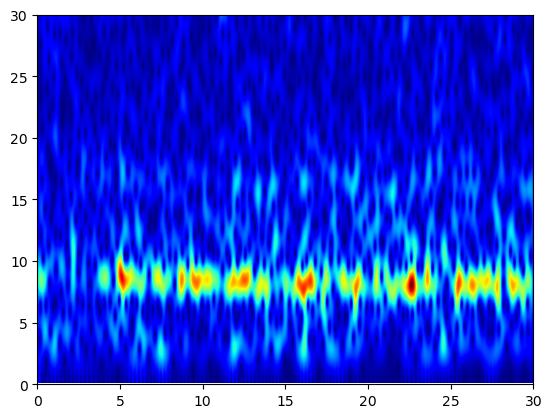

In [32]:
print('Morlet wavelet')
sig=np.linspace(0.1,45,128*45)
XW,S = spkit.cwt.ScalogramCWT(senal,t_f,fs=128,wType='Morlet', sig=sig)
plt.imshow(abs(XW),aspect='auto',origin ='lower', cmap=plt.cm.jet, extent=[t_f[0], t_f[-1], S[0], S[-1]],interpolation='sinc' )
plt.ylim(0,30)

In [34]:
len(S)

5760

In [35]:
iwave = pycwt.icwt(XW,S,dt)
XW_a,S_a = spkit.cwt.ScalogramCWT(iwave,t_f,fs=128,wType='Morlet', sig=sig)


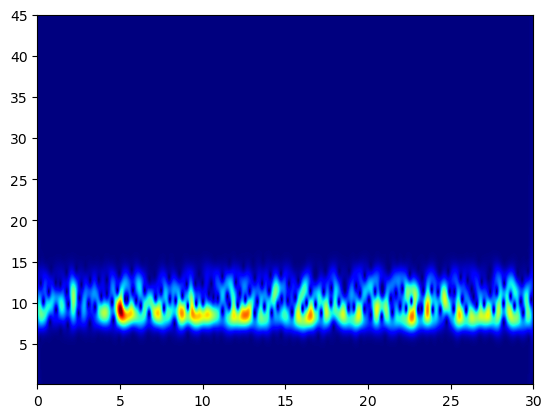

In [51]:
f_in=8
f_fin=13
S_filt=S[f_in*fm:f_fin*fm]
XW_filt=XW[f_in*fm:f_fin*fm]
iwave = pycwt.icwt(XW_filt,S_filt,dt)
XW_a,S_a = spkit.cwt.ScalogramCWT(iwave,t_f,fs=128,wType='Morlet', sig=sig)
plt.imshow(abs(XW_a),aspect='auto',origin ='lower', cmap=plt.cm.jet, extent=[t_f[0], t_f[-1], S_a[0], S_a[-1]],interpolation='sinc' )

In [22]:
len(XW)

5760

print('Morlet wavelet')
sig=np.linspace(0.1,45,128*45)
XW,S = spkit.cwt.ScalogramCWT(iwave,t_f,fs=128,wType='Morlet', sig=sig)
plt.imshow(abs(XW),aspect='auto',origin ='lower', cmap=plt.cm.jet, extent=[t_f[0], t_f[-1], S[0], S[-1]],interpolation='sinc' )
plt.ylim(0,30)